In [ ]:
ROOTDIR = "motsynth_baselines"
!git clone https://github.com/dvl-tum/motsynth-baselines.git $ROOTDIR

Cloning into 'motsynth_baselines'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 111 (delta 40), reused 48 (delta 17), pack-reused 0
Receiving objects: 100% (111/111), 1.51 MiB | 7.42 MiB/s, done.
Resolving deltas: 100% (40/40), done.


In [ ]:
%%shell

pip install https://github.com/phil-bergmann/tracking_wo_bnw/archive/master.zip
pip install https://github.com/KaiyangZhou/deep-person-reid/archive/master.zip
pip install https://github.com/JonathonLuiten/TrackEval/archive/master.zip

     | 2.8 MB 293 kB/s
  Created wheel for tracktor: filename=tracktor-0.0.1-py3-none-any.whl size=89346 sha256=d52b3fb46cbeec92c343e6dbe464e53f0bd84515e24146209e81e05c8f99fc45
  Stored in directory: /tmp/pip-ephem-wheel-cache-ibkbfucn/wheels/b5/aa/bf/57b159646f139ded5d7cc9d2e217bd06ee91387f50ef21ebfe
Successfully built tracktor
     - 447 kB 747 kB/s
     |████████████████████████████████| 5.8 MB 4.2 MB/s 
     |████████████████████████████████| 64 kB 2.6 MB/s 
     |████████████████████████████████| 190 kB 45.1 MB/s 
     |████████████████████████████████| 42 kB 1.0 MB/s 
     |████████████████████████████████| 42 kB 885 kB/s 
     |████████████████████████████████| 69 kB 6.4 MB/s 
     |████████████████████████████████| 97 kB 7.0 MB/s 
  Created wheel for torchreid: filename=torchreid-1.4.0-cp37-cp37m-linux_x86_64.whl size=477898 sha256=24bde5f9bfd3624c4a2c5415751e6b31b50fc1af2864be908c6a0dd455a773fa
  Stored in directory: /tmp/pip-ephem-wheel-cache-4nisezhw/wheels/92/00/3f/af0de0e3

In [ ]:
!wget -P trackeval https://omnomnom.vision.rwth-aachen.de/data/TrackEval/data.zip
!mkdir models
!wget -P models https://vision.in.tum.de/webshare/u/brasoand/motsynth/resnet50_fc512_reid_epoch_19.pth
!wget -P models https://vision.in.tum.de/webshare/u/brasoand/motsynth/maskrcnn_resnet50_fpn_epoch_10.pth

--2022-04-02 20:08:08--  https://omnomnom.vision.rwth-aachen.de/data/TrackEval/data.zip
Resolving omnomnom.vision.rwth-aachen.de (omnomnom.vision.rwth-aachen.de)... 137.226.34.132
Connecting to omnomnom.vision.rwth-aachen.de (omnomnom.vision.rwth-aachen.de)|137.226.34.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149957160 (143M) [application/zip]
Saving to: ‘trackeval/data.zip’

data.zip            100%[===================>] 143.01M  11.4MB/s    in 14s     

2022-04-02 20:08:24 (10.1 MB/s) - ‘trackeval/data.zip’ saved [149957160/149957160]

--2022-04-02 20:08:24--  https://vision.in.tum.de/webshare/u/brasoand/motsynth/resnet50_fc512_reid_epoch_19.pth
Resolving vision.in.tum.de (vision.in.tum.de)... 131.159.19.110, 2a09:80c0:18::1110
Connecting to vision.in.tum.de (vision.in.tum.de)|131.159.19.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402744149 (384M)
Saving to: ‘models/resnet50_fc512_reid_epoch_19.pth’

resnet50_fc512

In [ ]:
!pip install torch-summary

In [ ]:
import torch
from torchsummary import summary
from motsynth_baselines.src.detection.maskrcnn import maskrcnn_resnet_fpn
from motsynth_baselines.src.mots.maskrcnn_fpn import MaskPredictor

obj_detect_state_dict = torch.load(
            "models/maskrcnn_resnet50_fpn_epoch_10.pth", map_location=lambda storage, loc: storage)
if 'model' in obj_detect_state_dict:
    obj_detect_state_dict = obj_detect_state_dict['model']

obj_detect = MaskPredictor(num_classes=2)
obj_detect.load_state_dict(obj_detect_state_dict, strict=False)
summary(obj_detect)

Layer (type:depth-idx)                   Param #
├─GeneralizedRCNNTransform: 1-1          --
├─BackboneWithFPN: 1-2                   --
|    └─IntermediateLayerGetter: 2-1      --
|    |    └─Conv2d: 3-1                  (9,408)
|    |    └─FrozenBatchNorm2d: 3-2       --
|    |    └─ReLU: 3-3                    --
|    |    └─MaxPool2d: 3-4               --
|    |    └─Sequential: 3-5              (212,992)
|    |    └─Sequential: 3-6              1,212,416
|    |    └─Sequential: 3-7              7,077,888
|    |    └─Sequential: 3-8              14,942,208
|    └─FeaturePyramidNetwork: 2-2        --
|    |    └─ModuleList: 3-9              984,064
|    |    └─ModuleList: 3-10             2,360,320
|    |    └─LastLevelMaxPool: 3-11       --
├─RegionProposalNetwork: 1-3             --
|    └─AnchorGenerator: 2-3              --
|    └─RPNHead: 2-4                      --
|    |    └─Conv2d: 3-12                 590,080
|    |    └─Conv2d: 3-13                 771
|    |    └─Conv2d:

Layer (type:depth-idx)                   Param #
├─GeneralizedRCNNTransform: 1-1          --
├─BackboneWithFPN: 1-2                   --
|    └─IntermediateLayerGetter: 2-1      --
|    |    └─Conv2d: 3-1                  (9,408)
|    |    └─FrozenBatchNorm2d: 3-2       --
|    |    └─ReLU: 3-3                    --
|    |    └─MaxPool2d: 3-4               --
|    |    └─Sequential: 3-5              (212,992)
|    |    └─Sequential: 3-6              1,212,416
|    |    └─Sequential: 3-7              7,077,888
|    |    └─Sequential: 3-8              14,942,208
|    └─FeaturePyramidNetwork: 2-2        --
|    |    └─ModuleList: 3-9              984,064
|    |    └─ModuleList: 3-10             2,360,320
|    |    └─LastLevelMaxPool: 3-11       --
├─RegionProposalNetwork: 1-3             --
|    └─AnchorGenerator: 2-3              --
|    └─RPNHead: 2-4                      --
|    |    └─Conv2d: 3-12                 590,080
|    |    └─Conv2d: 3-13                 771
|    |    └─Conv2d:

In [ ]:
!wget https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg
!wget https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/bus.jpg

--2022-04-02 20:09:53--  https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168949 (165K) [image/jpeg]
Saving to: ‘zidane.jpg’

zidane.jpg          100%[===================>] 164.99K  --.-KB/s    in 0.03s   

2022-04-02 20:09:54 (6.19 MB/s) - ‘zidane.jpg’ saved [168949/168949]

--2022-04-02 20:09:54--  https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/bus.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 487438 (476K) [image/jpe

In [ ]:
import torch
import torchvision
import PIL
import numpy as np

def img_to_torch(img_path):
  img = PIL.Image.open(img_path)
  img = np.array(img)
  img = torchvision.transforms.ToTensor()(img)
  #img = torch.from_numpy(img)
  img = torch.unsqueeze(img, 0)
  
  print(img.shape, type(img))
  return img

In [ ]:
import matplotlib.pyplot as plt

def plot(img, boxes):
  fig, ax = plt.subplots(1, dpi=96)

  img = img.mul(255).permute(1, 2, 0).byte().numpy()
  width, height, _ = img.shape
    
  ax.imshow(img, cmap='gray')
  fig.set_size_inches(width / 80, height / 80)

  for box in boxes:
      rect = plt.Rectangle(
        (box[0], box[1]),
        box[2] - box[0],
        box[3] - box[1],
        fill=False,
        linewidth=1.0)
      ax.add_patch(rect)

  plt.axis('off')
  plt.show()

In [ ]:
imgs = []
imgs.append(img_to_torch("zidane.jpg"))
imgs.append(img_to_torch("bus.jpg"))

obj_detect.load_image(imgs[1])
#print(obj_detect.preprocessed_images.tensors.shape)
boxes, scores = obj_detect.detect(imgs[1])
pred_masks = obj_detect.predict_masks(boxes, return_roi_masks=False)
#plot(imgs[1][0], pred_boxes)

#res = obj_detect(imgs[1])
#plot(imgs[1][0], res[0]["boxes"].detach())

torch.Size([1, 3, 720, 1280]) <class 'torch.Tensor'>
torch.Size([1, 3, 1080, 810]) <class 'torch.Tensor'>


/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


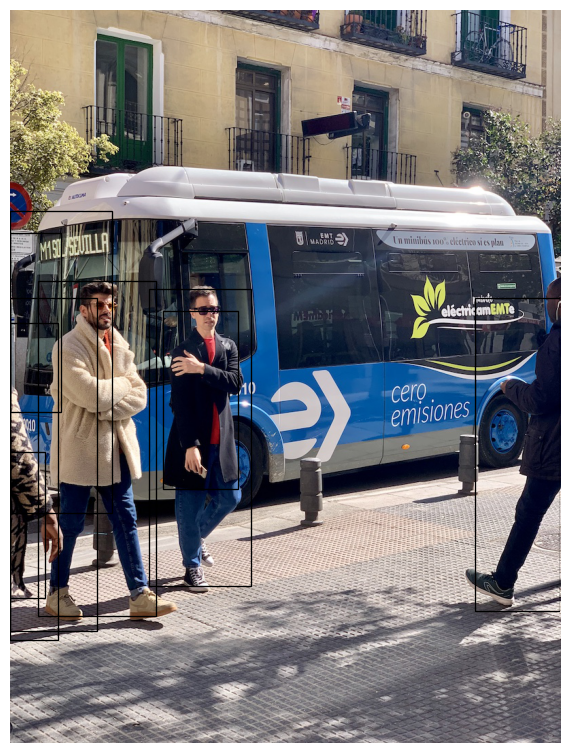

In [ ]:
plot(imgs[1][0], boxes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


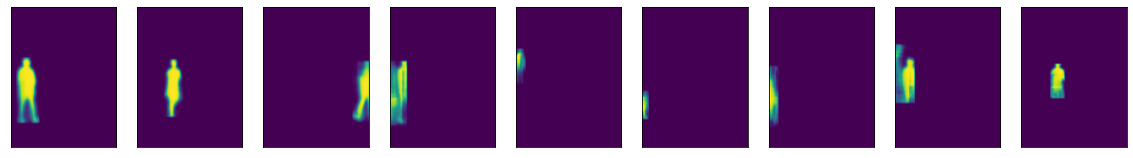

In [ ]:
import matplotlib.pyplot as plt

fig, p = plt.subplots(1, len(pred_masks))
for idx, mask in enumerate(pred_masks):
    p[idx].set_xticks([], [])
    p[idx].set_yticks([], [])
    p[idx].imshow(mask[0].detach())
fig.set_figwidth(20)
fig.set_figheight(10)
plt.show()

In [ ]:
import torch
from torchreid.models.resnet import resnet50

obj_detect_state_dict = torch.load(
            "models/maskrcnn_resnet50_fpn_epoch_10.pth", map_location=lambda storage, loc: storage)
if 'model' in obj_detect_state_dict:
    obj_detect_state_dict = obj_detect_state_dict['model']

resnet50 = resnet50(num_classes=2)
resnet50.load_state_dict(obj_detect_state_dict, strict=False)
summary(resnet50)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
|    └─Bottleneck: 2-1                   --
|    |    └─Conv2d: 3-1                  4,096
|    |    └─BatchNorm2d: 3-2             128
|    |    └─Conv2d: 3-3                  36,864
|    |    └─BatchNorm2d: 3-4             128
|    |    └─Conv2d: 3-5                  16,384
|    |    └─BatchNorm2d: 3-6             512
|    |    └─ReLU: 3-7                    --
|    |    └─Sequential: 3-8              16,896
|    └─Bottleneck: 2-2                   --
|    |    └─Conv2d: 3-9                  16,384
|    |    └─BatchNorm2d: 3-10            128
|    |    └─Conv2d: 3-11                 36,864
|    |    └─BatchNorm2d: 3-12            128
|    |    └─Conv2d: 3-13                 16,384
|    |    └─BatchNorm2d: 3-14      

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
|    └─Bottleneck: 2-1                   --
|    |    └─Conv2d: 3-1                  4,096
|    |    └─BatchNorm2d: 3-2             128
|    |    └─Conv2d: 3-3                  36,864
|    |    └─BatchNorm2d: 3-4             128
|    |    └─Conv2d: 3-5                  16,384
|    |    └─BatchNorm2d: 3-6             512
|    |    └─ReLU: 3-7                    --
|    |    └─Sequential: 3-8              16,896
|    └─Bottleneck: 2-2                   --
|    |    └─Conv2d: 3-9                  16,384
|    |    └─BatchNorm2d: 3-10            128
|    |    └─Conv2d: 3-11                 36,864
|    |    └─BatchNorm2d: 3-12            128
|    |    └─Conv2d: 3-13                 16,384
|    |    └─BatchNorm2d: 3-14      

In [ ]:
res = resnet50(imgs[1])

In [ ]:
print(res)

tensor([[0.2002, 0.6287, 0.4971,  ..., 0.0954, 0.2374, 0.2844]],
       grad_fn=<ViewBackward0>)
